# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [416]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "C:\\Users\\yadav thapa\\Desktop\\PyBer_Analysis\\Resource\\city_data.csv"
ride_data_to_load = "C:\\Users\\yadav thapa\\Desktop\\PyBer_Analysis\\Resource\\ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [417]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,Count,Type,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,38.0,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,59.0,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,67.0,Urban,NaN,NaN,NaN,NaN,NaN,urban_driver,2405.0,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34.0,Urban,NaN,NaN,NaN,NaN,NaN,suburban_driver,490.0,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,39.0,Urban,NaN,NaN,NaN,NaN,NaN,rural_driver,78.0,46,Urban


In [418]:
pyber_data_df.tail()

,city,date,fare,ride_id,Count,Type,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,driver_count,type
2490,Bradshawfurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Rural
2491,New Ryantown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Rural
2492,Randallchester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,Rural
2493,Jessicaport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Rural
2494,South Saramouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Rural


## Deliverable 1: Get a Summary DataFrame 

In [419]:
#  1. Get the total rides for each city type

In [420]:
total_ride = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [421]:
# 2. Get the total drivers for each city type


In [422]:
total_driver=city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [423]:
#  3. Get the total amount of fares for each city type


In [424]:
Total_fares=pyber_data_df.groupby(["type"]).sum()["fare"]
Total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [425]:
city_type_df = pyber_data_df["type"].unique()
city_type_df

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [426]:
# Calculate the fair per ride  each city type.
#tatal fare/total rides
average_fare_per_ride = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).count()["ride_id"]
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [427]:
# total fares/total ride_driver

average_fare_per_driver=pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df.groupby(["type"]).sum()["driver_count"]
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [428]:
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [429]:
# Creation of pyber_summary_df from dictionary method
pyber_summary_df = pd.DataFrame({
                                'Total Ride':total_ride,
                               'Total Drivers': total_driver,
                                'Total Fares':Total_fares,
                                'Average Fare per Ride':average_fare_per_driver,
                                'Average Fare per Driver':total_driver_count
                                })
  
pyber_summary_df

,Total Ride,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,55.486282,78
Suburban,625,490,19356.33,39.502714,490
Urban,1625,2405,39854.38,16.571468,2405


In [430]:
#  8. Format the columns Formatting
pyber_summary_df["Total Ride"]=pyber_summary_df["Total Ride"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"]=pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Ride,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$55.49,$78.00
Suburban,625,490,"$19,356.33",$39.50,$490.00
Urban,"1,625","2,405","$39,854.38",$16.57,$2405.00


In [431]:
#  7. Cleaning up the DataFrame. Delete the index name# set index name
pyber_summary_df.index.name = None

In [432]:
pyber_summary_df

,Total Ride,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$55.49,$78.00
Suburban,625,490,"$19,356.33",$39.50,$490.00
Urban,"1,625","2,405","$39,854.38",$16.57,$2405.00


In [433]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_the_fares = pyber_data_df.groupby(["date","type"]).sum()[["fare"]]
sum_of_the_fares



,,fare
date,type,
1/1/2019 0:08,Urban,37.91
1/1/2019 0:46,Suburban,47.74
1/1/2019 12:32,Suburban,25.56
1/1/2019 14:40,Urban,5.42
1/1/2019 14:42,Urban,12.31
...,...,...
5/8/2019 1:54,Urban,32.69
5/8/2019 2:31,Urban,41.33
5/8/2019 4:20,Urban,21.99


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [459]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_of_the_fares=sum_of_the_fares.reset_index()
sum_of_the_fares
# we should be very careful as we excute, it's is creating more indexing

,level_0,index,date,type,fare
0,0,0,1/1/2019 0:08,Urban,37.91
1,1,1,1/1/2019 0:46,Suburban,47.74
2,2,2,1/1/2019 12:32,Suburban,25.56
3,3,3,1/1/2019 14:40,Urban,5.42
4,4,4,1/1/2019 14:42,Urban,12.31
...,...,...,...,...,...
2359,2359,2359,5/8/2019 1:54,Urban,32.69
2360,2360,2360,5/8/2019 2:31,Urban,41.33
2361,2361,2361,5/8/2019 4:20,Urban,21.99
2362,2362,2362,5/8/2019 4:39,Urban,18.45


In [ ]:
#

In [461]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. Step #11
sum_of_fares =sum_of_the_fares.pivot(index="date",columns="type",values="fare")
sum_of_fares

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [493]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.
sum_of_fare1 =sum_of_fare1.loc['01/01/2019':'04/29/2019']
sum_of_fare1

,level_0,index,date,type,fare


In [494]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
sum_of_fare1.index = pd.to_datetime(sum_of_fare1.index)


In [495]:
sum_of_fare1.index.set_index('date', inplace=True)
sum_of_fare1.index

AttributeError: 'DatetimeIndex' object has no attribute 'set_index'

In [496]:
# 14. Check that the datatype for the index is datetime using df.info()
sum_of_fare1.index.dtype

dtype('<M8[ns]')

In [497]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare = sum_of_fare1.index.resample("W").sum()
weekly_fare

AttributeError: 'DatetimeIndex' object has no attribute 'resample'

NameError: name 'ax' is not defined

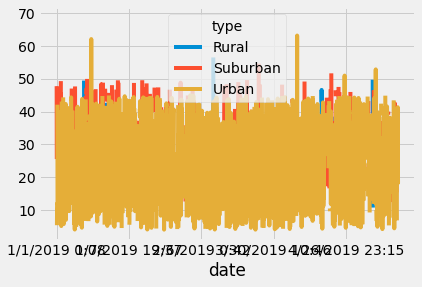

In [501]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
df=sum_of_fares
df.plot()
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
ax.df.plot(figsize=(30,5))
ax.set.title('Total fare by city', fontsize=10)
ax.set_xlable('Month')
ax.set_xlable('Fare($USD,fontsize=12)')

# set marker,color and size
ax.plot(sum_of_fares['Rural'],marker='*',color='skyblue')
ax.plot(sum_of_fares['Suburban'],marker='*',color='coral')
ax.plot(sum_of_fares['Rural'],marker='*',color='gold')
plt.show()


